# 머신러닝 (Machine Learning)


컴퓨터를 학습시켜 자동으로 개선시킬 수 있도록 만드는 컴퓨터 알고리즘 연구 : 기계학습

AI > ML > DL

* AI(Artificial Intelligence)
  - 인간의 지능과 유사한 기능을 가진 컴퓨터 시스템
  - 인간의 지능을 인공적으로 컴퓨터에 심어놓은 것 

* ML(Machine Learning)
  - 학습 모형을 기반으로 해서 외부에서 들어오는 data들을 스스로 학습하는 것 
  - 빅데이터를 분석하거나 가공해서 새로운 정보를 깨우치거나, 미래 예측이 가능하도록 하는 기술
  - 쌓아둔 데이터를 기반으로 서로간의 상관관계, 특성 등을 찾아냄

* DL(Deep Learning)
  - 컴퓨터가 다양한 데이터를 기반으로 사람처럼 스스로 학습할 수 있도록 하는 인공신경망을 구축하는 것
  - 축적된 데이터에 국한되는 것이 아니라, 데이터를 스스로 학습까지 하는 기계학습능력을 키워서 결과를 도출

In [ ]:
# 붓꽃 데이터 -> iris(seaborn dataset)
import seaborn as sns
import pandas as pd

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# seaborn 데이터를 csv로 저장, 읽어오기
iris.to_csv('iris.csv',index=False)

In [ ]:
iris = pd.read_csv('iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
import re
# 정규표현식 (regex)
# 문자열의 앞 부분이 매치되는가를 체크, 추출 match()
print(re.match('a','abcd'))
print(re.match('a','bcda'))

<re.Match object; span=(0, 1), match='a'>
None


In [ ]:
# 3항 연산자
# [참일때 값] if [조건식] else [거짓일때 값]
a = 3
# a가 3이면 10 출력 / 아니면 9 출력
# print(10) if a==3 else print(9)
b = 10 if (a == 3) else 9
print(b)
# a가 5면 10 출력 / 아니면 9 출력
c = 10 if (a == 5) else 9
print(c)

10
9


In [ ]:
import re, random
# scikit-learn : 머신러닝 라이브러리
from sklearn import svm, metrics

In [ ]:
csv=[]

with open('iris.csv','r',encoding='UTF-8') as f:
  for line in f:
    # print(line)
    line = line.strip() # 줄바꿈 처리 없애기
    line2 = line.split(',') #','기준으로 나누기
    # print(line2)
    
    # 문자형을 숫자형으로 바꾸기
    fn = lambda n : float(n) if re.match(r'^[0-9₩.]+$',n) else n

    line2 = list(map(fn,line2))
    csv.append(line2)

# csv

del csv[0] # 0번째 줄 지우기 (내용이 아닌 이름이라)
# csv

random.shuffle(csv)
total_len = len(csv) # 몇개의 데이터가 있는가?
# print(total_len)

train_len = int(total_len * 2 / 3 ) # 2/3 정도만
# print(train_len)

train_data = []
train_label = []
test_data = []
test_label = []

for i in range(total_len):
  data = csv[i][0:3] # csv의 0~3번째는 data에 넣고
  label = csv[i][4]
  if (i < train_len): #  학습시키려는 갯수보다 작다면 (2/3개 100개는 여기)
    train_data.append(data)
    train_label.append(label)
  else: # 그게 아니면 (나머지 50개 여기)
    test_data.append(data)
    test_label.append(label)

# test_data

# 학습된 데이터와 50개 데이터 비교해서 비율
clf = svm.SVC()
clf.fit(train_data, train_label) # 학습
pre = clf.predict(test_data)

# 맞게 예측한 데이터 비율(정확도)
ac_score = metrics.accuracy_score(test_label,pre)
ac_score

0.92

In [ ]:
csv = pd.read_csv('iris.csv')
csv

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
from sklearn.model_selection import train_test_split
# train / test 분리

In [ ]:
csv_data = csv[['sepal_length',	'sepal_width',	'petal_length','petal_width']]
csv_label = csv['species']

train_data, test_data, train_label, test_label = train_test_split(csv_data, csv_label)

clf = svm.SVC()
clf.fit(train_data, train_label)
pre = clf.predict(test_data)

ac_score = metrics.accuracy_score(test_label,pre)
ac_score

0.9210526315789473

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
iris    # dict와 유사한 형태 - key/value  

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
# key 값만 뽑아보기
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# 데이터셋의 정보
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
# 붓꽃 품종이름
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# 열 이름 구성
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# label 데이터
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    iris['data'], iris['target'], random_state=0
)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(112, 4)
(112,)
(38, 4)
(38,)


In [ ]:
!pip install mglearn
import mglearn

     |████████████████████████████████| 540 kB 5.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=3618ed9dc2b8b07beaaf9bb9dd145d0c3b9940b9a04d96d122f5f6b1a6f218e8
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f035890a1d0>,
      dtype=object)

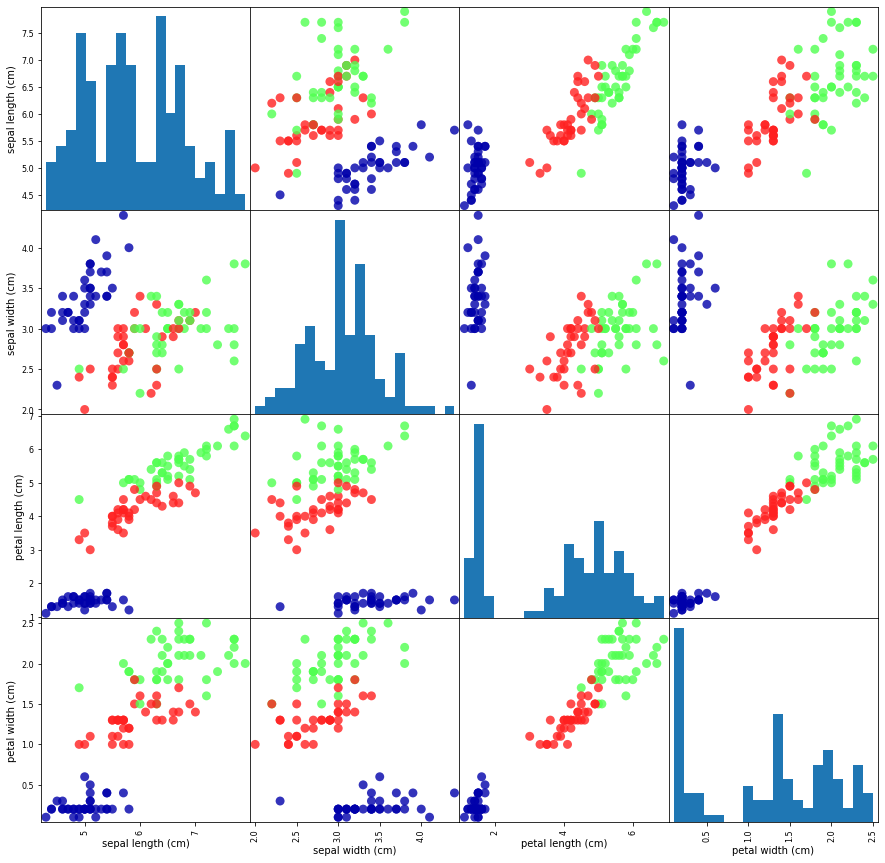

In [ ]:
irisDF = pd.DataFrame(x_train, columns=iris.feature_names)
irisDF
pd.plotting.scatter_matrix(irisDF, c=y_train, figsize=(15, 15), marker = 'o',
                           hist_kwds={'bins':20}, s=80, alpha=0.8, cmap=mglearn.cm3)

In [ ]:
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

In [ ]:
bmi = pd.read_csv('bmi.csv')
bmi.head()

# 열 나누기 / 정규화 하기
label = bmi['label']
h = bmi['height'] / 200 
w = bmi['weight'] / 100
hw = pd.concat([h,w], axis=1) # dateframe 합치는 concat # axis=1 열 기준으로
hw

# train / test 나눠서 -> 학습 -> 예측 / 실행 -> 정확도 출력

# 데이터 나누기
train_data, test_data, train_label, test_label = train_test_split(hw, label)

# 객체 생성
clf = svm.SVC()

# 데이터 학습
clf.fit(train_data, train_label)

# 예측 / 실행
pre = clf.predict(test_data)

# 정확도
ac_score = metrics.accuracy_score(test_label,pre)
ac_score

# 각각의 평가(분류) 지표
report = metrics.classification_report(test_label, pre)
print(report)

              precision    recall  f1-score   support

         fat       1.00      0.99      1.00      1966
      normal       0.99      0.99      0.99      1466
        thin       0.99      1.00      1.00      1568

    accuracy                           1.00      5000
   macro avg       0.99      1.00      0.99      5000
weighted avg       1.00      1.00      1.00      5000

